<a href="https://colab.research.google.com/github/Orliluq/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El Desafío: ¿Quién Abordaría el Bote Salvavidas?
Imagina que eres un detective que investiga un caso histórico. Tienes un montón de pistas (datos de los pasajeros) y necesitas descubrir patrones que te ayuden a resolver el misterio de la supervivencia. ¡Ese es el desafío del Titanic!

## **Paso 1: Entender el Problema**
Antes de comenzar a construir el modelo, es crucial comprender el problema. El objetivo es construir un modelo predictivo que pueda identificar patrones y determinar qué factores influenciaron en la supervivencia.

## **Paso 2: Exploración de los Datos**
La exploración de datos es una etapa fundamental. Aquí se analizan los datos disponibles, se identifican las características más relevantes y se detectan posibles problemas, como valores nulos o anomalías. ¿Los niños y las mujeres tuvieron más probabilidades de sobrevivir? ¿La clase social influyó en las probabilidades de supervivencia? Ejemplo:
Lo primero que debes hacer es explorar el conjunto de datos, que incluye información de los pasajeros:
- Pclass: Clase del ticket (1ª, 2ª, 3ª)
- Sex: Género del pasajero
- Age: Edad
- SibSp: Número de hermanos/esposos a bordo
- Parch: Número de padres/hijos a bordo
- Fare: Tarifa pagada por el boleto
- Embarked: Puerto de embarque
- Survived (solo en el set de entrenamiento): 1 si sobrevivió, 0 si no.

In [ ]:
# Instalar las librerias necesarias
!pip install pandas scikit-learn seaborn matplotlib

# Importar librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Cargar datos
gender_submission_df = pd.read_csv("/content/gender_submission.csv")
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

# Mostrar primeras filas
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Paso 3: Limpieza de Datos**
La limpieza de datos implica tratar valores nulos, eliminar duplicados y transformar variables según sea necesario. En este caso, podríamos imputar valores nulos en las edades o eliminar registros con demasiados datos faltantes. Al analizar los datos, notarás que hay valores nulos en Age, Cabin y Embarked, por lo que hay que manejarlos:

✔️ Rellenar los valores faltantes en Age con la mediana.

✔️ Rellenar Embarked con el valor más frecuente.

✔️ Ignorar la columna Cabin, ya que tiene muchos valores faltantes.

🔹 Ejemplo:

In [ ]:
# Limpieza de datos
# Llenar valores nulos en 'Age' con la mediana
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
# Llenar valores nulos en 'Embarked' con el valor más frecuente
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
# Eliminar la columna 'Cabin'
train_df.drop("Cabin", axis=1, inplace=True)

<ipython-input-43-87ad4d62a60e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
<ipython-input-43-87ad4d62a60e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

También convertimos las variables categóricas en numéricas:

In [ ]:
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
train_df["Embarked"] = train_df["Embarked"].map({"C": 0, "Q": 1, "S": 2})

## **Paso 4: Ingeniería de Características**
La ingeniería de características consiste en crear nuevas características a partir de las existentes. A veces, las pistas no son lo que parecen. Necesitas crear nuevas variables que capturen mejor la información. Por ejemplo, puedes combinar la edad y el género para crear una nueva variable que represente "niño" o "adulto". Por ejemplo, podemos transformar la columna 'Sex' en variables dummy y crear una nueva característica basada en el tamaño de la familia del pasajero. Ejemplo:

In [ ]:
# Crear una nueva característica 'FamilySize'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_df[features]
y = train_df["Survived"]

## **Paso 5: División de Datos**
Dividir los datos en conjuntos de entrenamiento y prueba es crucial para evaluar el rendimiento del modelo. Se suele usar una proporción del 70–80% de los datos para el entrenamiento y el resto para las pruebas. Ejemplo:

In [ ]:
# División de datos
# Separar en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## **Paso 6: Análisis Exploratorio de Datos (EDA)**
Antes de entrenar el modelo, es clave encontrar patrones en los datos. Ejemplo de visualización de sobrevivientes por género:

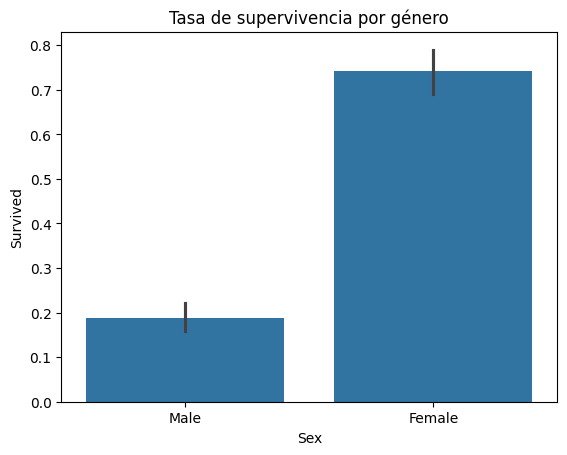

In [ ]:
# Análisis Exploratorio de Datos (EDA)
# Visualización de sobrevivientes por género (usando 'train_df' que contiene la columna 'Sex' original)
sns.barplot(x="Sex", y="Survived", data=train_df)
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.title("Tasa de supervivencia por género")
plt.show()

📌 Hallazgos importantes:

✔️ Las mujeres tenían muchas más probabilidades de sobrevivir que los hombres.

✔️ Los pasajeros de 1ª clase tenían más chances de sobrevivir que los de 3ª clase.

## **Paso 7: Selección de Modelos**
Elige tu herramienta de detective favorita. Hay muchos modelos de Machine Learning que puedes usar, como la regresión logística, los árboles de decisión o los bosques aleatorios. Cada uno tiene sus propias fortalezas y debilidades.

## **Paso 8: Entrenamiento del Modelo**
Seleccionar y entrenar un modelo de aprendizaje automático es el siguiente paso. Los algoritmos comunes incluyen árboles de decisión, bosques aleatorios y modelos de regresión logística. Entrena tu modelo con los datos disponibles y evalúa su rendimiento. ¿Qué tan bien predice quién sobrevivió y quién no? Ajusta los parámetros de tu modelo para mejorar su precisión. Ejemplo:
Ahora usamos un modelo de Machine Learning, como un Random Forest, para hacer predicciones.

In [ ]:
# Entrenar modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Con este modelo, podemos obtener una precisión del ~80% en la predicción de supervivencia.

## **Paso 9: Evaluación del Modelo**
Evaluar el rendimiento del modelo es esencial para entender su eficacia. Se utilizan métricas como la precisión, la exactitud y la matriz de confusión para analizar el rendimiento. Ejemplo:

In [ ]:
# Evaluación del modelo
# Realizar predicciones en el conjunto de validacion (usando 'X_val' que fue definido en la división de datos)
y_pred = model.predict(X_val)

# Calcular la precisión
accuracy = accuracy_score(y_val, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)

Precisión del modelo: 0.8156424581005587
[[90 15]
 [18 56]]


In [ ]:
# Visualización de la importancia de las características
feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

<ipython-input-53-07bdffb53e51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=train_df, palette="muted")


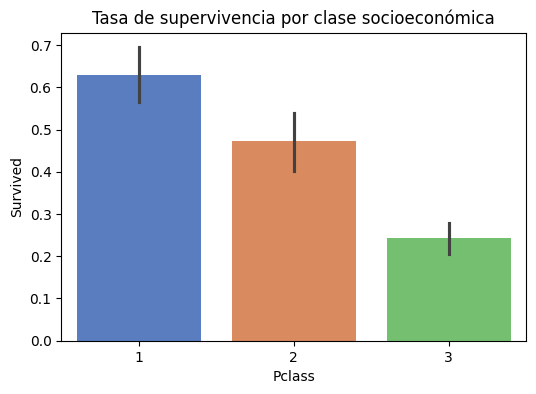

In [ ]:
# Gráfico de supervivencia por clase socioeconómica
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", data=train_df, palette="muted")
plt.title("Tasa de supervivencia por clase socioeconómica")
plt.show()

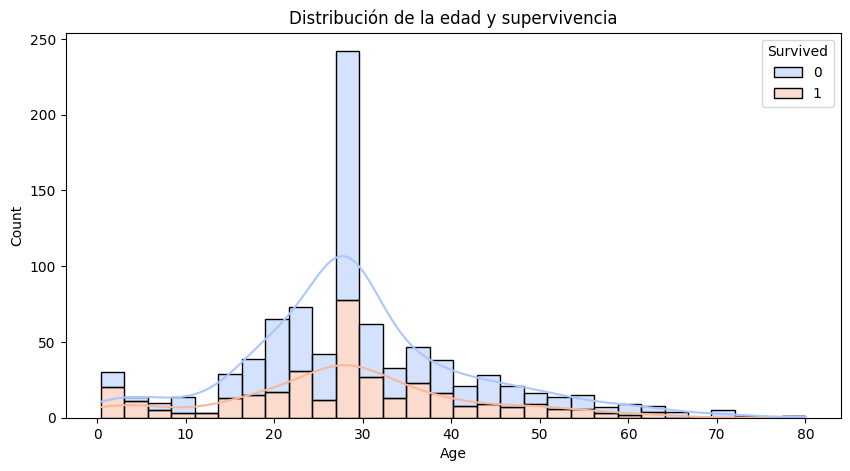

In [ ]:
# Gráfico de supervivencia por edad
plt.figure(figsize=(10, 5))
sns.histplot(train_df, x="Age", hue="Survived", bins=30, kde=True, palette="coolwarm", multiple="stack")
plt.title("Distribución de la edad y supervivencia")
plt.show()

## **Paso 10: Generar Predicciones 🚀**
Usamos el modelo para predecir en el conjunto de test. Ejemplo:

In [ ]:
# Generar Predicciones
# Predecir en test.csv (usando 'test_df' que es el dataframe original de test)

# Apply the same data cleaning transformations to test_df as you did to train_df
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)

# Verificar si la columna 'Cabin' existe antes de intentar eliminarla
if "Cabin" in test_df.columns:
    test_df.drop("Cabin", axis=1, inplace=True)

test_df["Sex"] = test_df["Sex"].map({"male": 0, "female": 1})
test_df["Embarked"] = test_df["Embarked"].map({"C": 0, "Q": 1, "S": 2})
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

X_test = test_df[features]
test_df["Survived"] = model.predict(X_test)

# Guardar resultados
submission = test_df[["PassengerId", "Survived"]]
submission.to_csv("submission.csv", index=False)

<ipython-input-57-085f27814e95>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
<ipython-input-57-085f27814e95>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

## **Consejos para el Éxito**
- No tengas miedo de experimentar: Prueba diferentes modelos, técnicas de ingeniería de características y estrategias de validación. ¡La clave está en la exploración!
- Aprende de los demás: Explora los cuadernos de otros participantes en Kaggle y aprende de sus enfoques. ¡La comunidad es un recurso valioso!
- Sé crítico con tus resultados: No te conformes con el primer modelo que encuentres. Busca formas de mejorar tu precisión y asegúrate de que tus resultados sean robustos.

In [ ]:
# Resumen de hallazgos
respuesta = """
Basándonos en los datos y el modelo de Machine Learning, podemos afirmar lo siguiente:

1. **Género y supervivencia**: Las mujeres tuvieron una mayor tasa de supervivencia que los hombres, lo que concuerda con la política de evacuación de "mujeres y niños primero".

2. **Clase socioeconómica y supervivencia**: La probabilidad de sobrevivir fue mayor para las personas en primera clase, lo que sugiere que el acceso a los botes salvavidas fue más favorable para los pasajeros de mayor estatus.

3. **Edad y supervivencia**: Se observa una mayor tasa de supervivencia en los niños pequeños, reforzando la idea de que "mujeres y niños primero" fue una práctica seguida durante la evacuación.

En conclusión, la ciencia de datos permite comprender mejor los factores que influyeron en la supervivencia en el Titanic. Variables como el género, la clase y la edad fueron determinantes en la probabilidad de sobrevivir.
"""

print(respuesta)


Basándonos en los datos y el modelo de Machine Learning, podemos afirmar lo siguiente:

1. **Género y supervivencia**: Las mujeres tuvieron una mayor tasa de supervivencia que los hombres, lo que concuerda con la política de evacuación de "mujeres y niños primero".

2. **Clase socioeconómica y supervivencia**: La probabilidad de sobrevivir fue mayor para las personas en primera clase, lo que sugiere que el acceso a los botes salvavidas fue más favorable para los pasajeros de mayor estatus.

3. **Edad y supervivencia**: Se observa una mayor tasa de supervivencia en los niños pequeños, reforzando la idea de que "mujeres y niños primero" fue una práctica seguida durante la evacuación.

En conclusión, la ciencia de datos permite comprender mejor los factores que influyeron en la supervivencia en el Titanic. Variables como el género, la clase y la edad fueron determinantes en la probabilidad de sobrevivir.

